<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/ML2101%E6%9C%9F_WEEK3_%E9%81%A0%E8%97%A4%E4%BC%B8_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C1_%E4%BD%8F%E5%AE%85%E6%83%85%E5%A0%B1%E3%81%AE%E5%88%86%E6%9E%90_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK3　授業前課題２　住宅情報の分析　by　遠藤　伸

# 【問題1】データセットの取得

In [ ]:
import pandas as pd

DATA_DIR='C:/Users/es/Documents/Python Scripts/Week3/'
data = pd.read_csv(f'{DATA_DIR}train.csv')

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 【問題2】データセット自体の調査

アイオワ州エイムズの住宅の（ほぼ）すべての側面を説明する79の説明変数（住宅の基礎、躯体、設備等の材質、品質や近隣の様子など住宅を特徴付ける変数）と販売価格の一覧を格納している。

# 【問題3】データの確認

### ・各特徴量がどういったものかを見る。（数値データか文字データなど）
```py
数値項目：38項目
文字項目：43項目
```
### ・今回の目的変数はどの列か確認する。
```py
販売価格（Sales Price）
```
### ・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応

In [ ]:
!pip install missingno
import missingno as msno
%matplotlib inline

In [ ]:
import numpy as np
data = data.replace('NA',np.nan)

### ・各特徴量の欠損値の有無を確認する。

<AxesSubplot:>

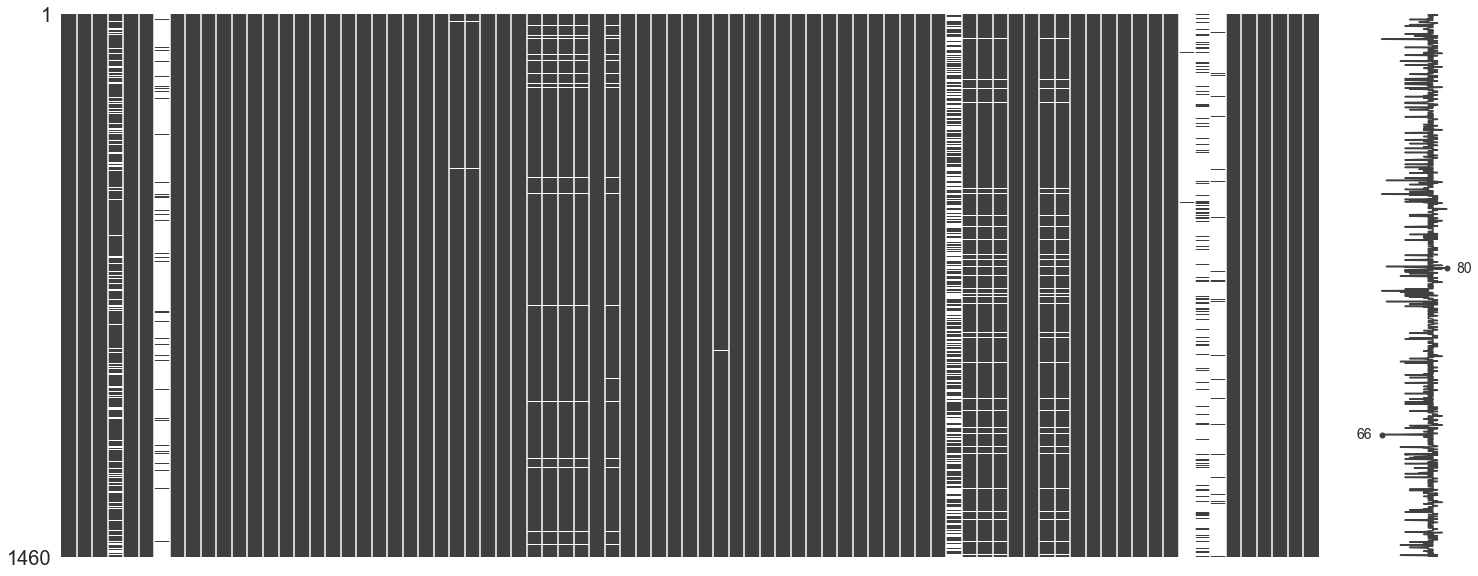

In [ ]:
lendata = len(data)
msno.matrix(data.sample(lendata))

### ・欠損値が何パーセント含まれるかを確認する。

In [ ]:
col_names = data.columns
for col_name in col_names:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / lendata * 100))

Id : missing 0 , missing_ratio 0.0%
MSSubClass : missing 0 , missing_ratio 0.0%
MSZoning : missing 0 , missing_ratio 0.0%
LotFrontage : missing 259 , missing_ratio 17.7%
LotArea : missing 0 , missing_ratio 0.0%
Street : missing 0 , missing_ratio 0.0%
Alley : missing 1369 , missing_ratio 93.8%
LotShape : missing 0 , missing_ratio 0.0%
LandContour : missing 0 , missing_ratio 0.0%
Utilities : missing 0 , missing_ratio 0.0%
LotConfig : missing 0 , missing_ratio 0.0%
LandSlope : missing 0 , missing_ratio 0.0%
Neighborhood : missing 0 , missing_ratio 0.0%
Condition1 : missing 0 , missing_ratio 0.0%
Condition2 : missing 0 , missing_ratio 0.0%
BldgType : missing 0 , missing_ratio 0.0%
HouseStyle : missing 0 , missing_ratio 0.0%
OverallQual : missing 0 , missing_ratio 0.0%
OverallCond : missing 0 , missing_ratio 0.0%
YearBuilt : missing 0 , missing_ratio 0.0%
YearRemodAdd : missing 0 , missing_ratio 0.0%
RoofStyle : missing 0 , missing_ratio 0.0%
RoofMatl : missing 0 , missing_ratio 0.0%
Exteri

### ・5つ以上欠損値がある特徴量（列）は削除する。

In [ ]:
data=data.dropna(thresh=lendata-4, axis=1)

<AxesSubplot:>

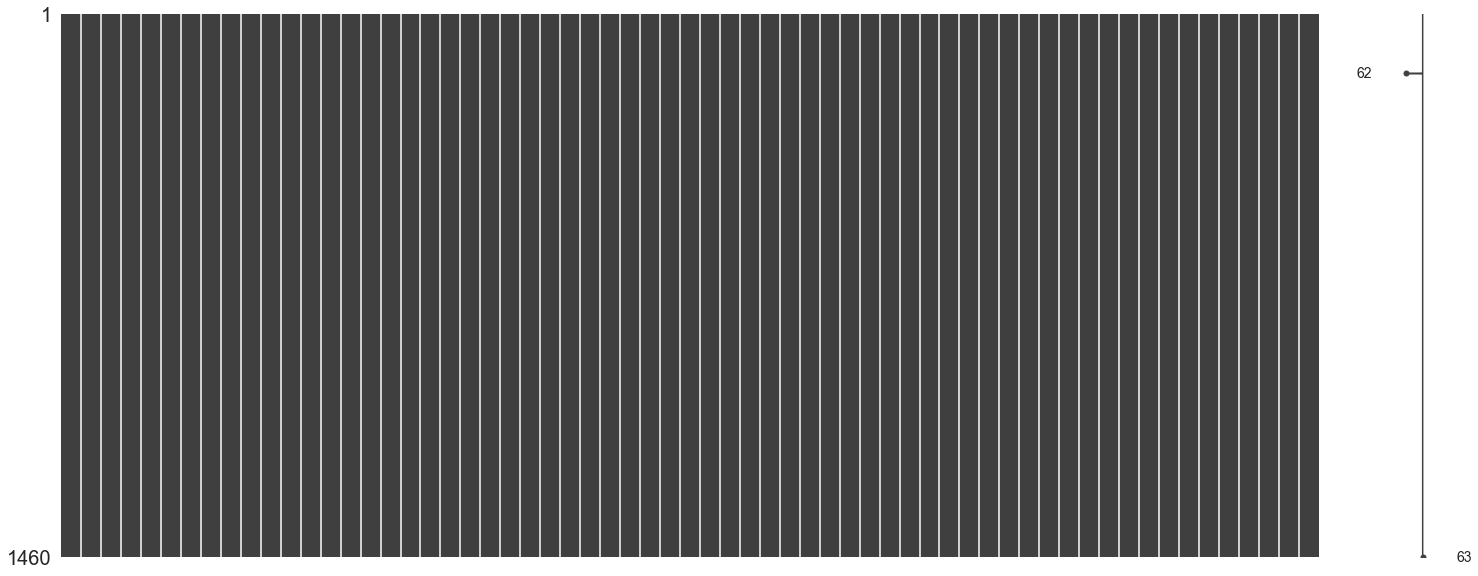

In [ ]:
msno.matrix(data.sample(lendata))

In [ ]:
col_names = data.columns
for col_name in col_names:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / lendata * 100))

Id : missing 0 , missing_ratio 0.0%
MSSubClass : missing 0 , missing_ratio 0.0%
MSZoning : missing 0 , missing_ratio 0.0%
LotArea : missing 0 , missing_ratio 0.0%
Street : missing 0 , missing_ratio 0.0%
LotShape : missing 0 , missing_ratio 0.0%
LandContour : missing 0 , missing_ratio 0.0%
Utilities : missing 0 , missing_ratio 0.0%
LotConfig : missing 0 , missing_ratio 0.0%
LandSlope : missing 0 , missing_ratio 0.0%
Neighborhood : missing 0 , missing_ratio 0.0%
Condition1 : missing 0 , missing_ratio 0.0%
Condition2 : missing 0 , missing_ratio 0.0%
BldgType : missing 0 , missing_ratio 0.0%
HouseStyle : missing 0 , missing_ratio 0.0%
OverallQual : missing 0 , missing_ratio 0.0%
OverallCond : missing 0 , missing_ratio 0.0%
YearBuilt : missing 0 , missing_ratio 0.0%
YearRemodAdd : missing 0 , missing_ratio 0.0%
RoofStyle : missing 0 , missing_ratio 0.0%
RoofMatl : missing 0 , missing_ratio 0.0%
Exterior1st : missing 0 , missing_ratio 0.0%
Exterior2nd : missing 0 , missing_ratio 0.0%
ExterQu

### ・欠損値があるサンプル（行）は削除する。

In [ ]:
data = data.dropna(how='any')

In [ ]:
lendata_droped = len(data)

<AxesSubplot:>

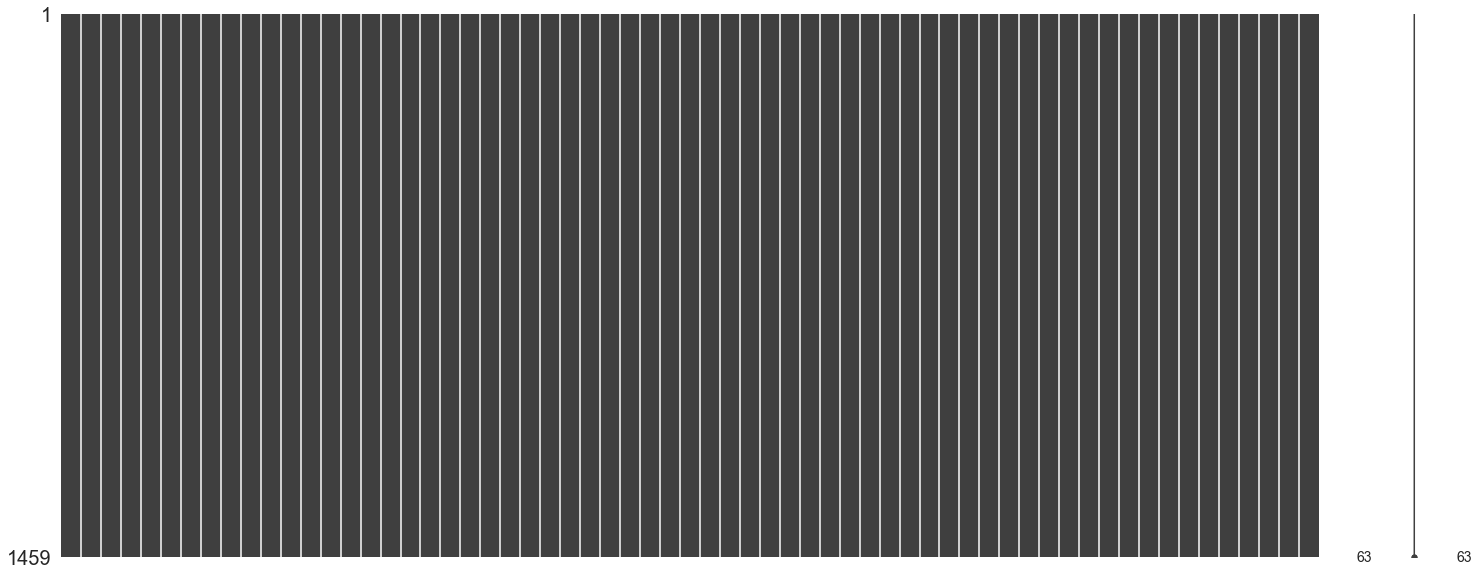

In [ ]:
msno.matrix(data.sample(lendata_droped))

In [ ]:
col_names = data.columns
for col_name in col_names:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / lendata * 100))

Id : missing 0 , missing_ratio 0.0%
MSSubClass : missing 0 , missing_ratio 0.0%
MSZoning : missing 0 , missing_ratio 0.0%
LotArea : missing 0 , missing_ratio 0.0%
Street : missing 0 , missing_ratio 0.0%
LotShape : missing 0 , missing_ratio 0.0%
LandContour : missing 0 , missing_ratio 0.0%
Utilities : missing 0 , missing_ratio 0.0%
LotConfig : missing 0 , missing_ratio 0.0%
LandSlope : missing 0 , missing_ratio 0.0%
Neighborhood : missing 0 , missing_ratio 0.0%
Condition1 : missing 0 , missing_ratio 0.0%
Condition2 : missing 0 , missing_ratio 0.0%
BldgType : missing 0 , missing_ratio 0.0%
HouseStyle : missing 0 , missing_ratio 0.0%
OverallQual : missing 0 , missing_ratio 0.0%
OverallCond : missing 0 , missing_ratio 0.0%
YearBuilt : missing 0 , missing_ratio 0.0%
YearRemodAdd : missing 0 , missing_ratio 0.0%
RoofStyle : missing 0 , missing_ratio 0.0%
RoofMatl : missing 0 , missing_ratio 0.0%
Exterior1st : missing 0 , missing_ratio 0.0%
Exterior2nd : missing 0 , missing_ratio 0.0%
ExterQu

# 【問題5】用語の調査

### 歪度
```py
歪度は正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す。
サンプル数=n、各データをXi（i=1～n）、平均を x̄ 、標準偏差をsで表すと、

　　歪度= (n / (n-1)*(n-2)) * Σ(((Xi - x̄)/s)^3)

正規分布の場合、歪度=0で、右に偏ると歪度はマイナスとなり、左に偏ると歪度はプラスになる。
```
### 尖度
```py
尖度は尖度分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。
サンプル数=n、各データをXi（i=1～n）、平均を x̄ 、標準偏差をsで表すと、

　　尖度= (n*(n+1) / (n-1)*(n-2)*(n-3)) * Σ(((Xi - x̄)^4) / (s^4)) - (3*(n-1) / ((n-2)*(n-3)))

正規分布の場合、歪度=0で、正規分布より扁平な分布の場合はマイナスとなり、正規分布より尖るとプラスになる。
```

# 【問題6】分布の確認

### ・seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

C:\Users\es\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


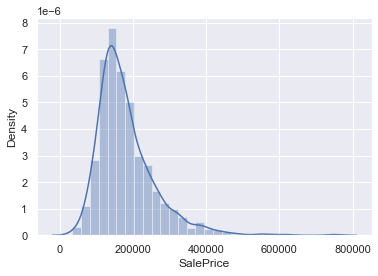

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns, numpy as np
ax = sns.distplot(data['SalePrice'], bins=30)

In [ ]:
print("歪度={}、尖度={}".format(data['SalePrice'].skew(),data['SalePrice'].kurtosis()))

歪度=1.8819429948035529、尖度=6.529263049673958


### ・目的変数に対して対数変換を行う。

In [ ]:
corrected = np.log(data['SalePrice'])

### ・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

C:\Users\es\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


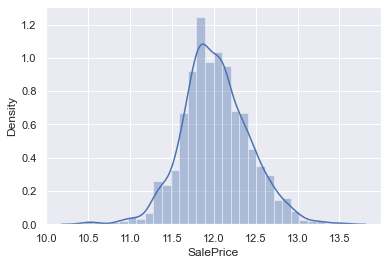

In [ ]:
ax = sns.distplot(corrected, bins=30)

In [ ]:
print("歪度={}、尖度={}".format(corrected.skew(),corrected.kurtosis()))

歪度=0.12131775882415026、尖度=0.806927847502148


# 【問題7】相関係数の確認

### ・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [ ]:
data_corr = data.corr(method='pearson', min_periods=1)
print("{}".format(data_corr))

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.010589 -0.033170    -0.027553     0.013167   
MSSubClass     0.010589    1.000000 -0.139766     0.032936    -0.059134   
LotArea       -0.033170   -0.139766  1.000000     0.105786    -0.005665   
OverallQual   -0.027553    0.032936  0.105786     1.000000    -0.092243   
OverallCond    0.013167   -0.059134 -0.005665    -0.092243     1.000000   
YearBuilt     -0.013945    0.027435  0.014296     0.573334    -0.375780   
YearRemodAdd  -0.023158    0.040199  0.013852     0.551605     0.074158   
BsmtFinSF1    -0.004001   -0.069501  0.214121     0.239265    -0.046595   
BsmtFinSF2    -0.005668   -0.065549  0.111158    -0.059291     0.040132   
BsmtUnfSF     -0.007508   -0.140627 -0.002641     0.308018    -0.137008   
TotalBsmtSF   -0.013815   -0.238160  0.260962     0.537523    -0.171796   
1stFlrSF       0.011627   -0.251484  0.299533     0.475933    -0.144646   
2ndFlrSF       0.004885  

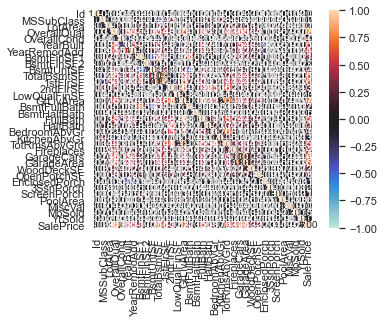

In [ ]:
sns.heatmap(
	data_corr,
	cbar = True,
	square = True,
	vmin = -1.0,
	vmax =  1.0,
	center = 0,
	annot = True,
	annot_kws={ 'size':10 },
	fmt='.2f',
	xticklabels = x_corr.columns.values,
	yticklabels = x_corr.columns.values,
)
plt.show()

### 考察
```py
特徴量は数値項目の必要があるため、相関関数で表示できるものは数字項目のみと考えられる。
各特徴量の目的変数（SalePrice）との相関関数は以下のとおりである（相関が高い順にソート）。
特徴量	SalePrice
SalePrice	1
OverallQual	0.791069
GrLivArea	0.708618
GarageCars	0.640473
GarageArea	0.623423
TotalBsmtSF	0.613905
1stFlrSF	0.605968
FullBath	0.560881
TotRmsAbvGrd	0.533779
YearBuilt	0.523273
YearRemodAdd	0.50743
Fireplaces	0.466968
BsmtFinSF1	0.386436
WoodDeckSF	0.324422
2ndFlrSF	0.319464
OpenPorchSF	0.315831
HalfBath	0.2844
LotArea	0.263837
BsmtFullBath	0.227082
BsmtUnfSF	0.214446
BedroomAbvGr	0.168235
ScreenPorch	0.111419
PoolArea	0.092397
MoSold	0.04638
3SsnPorch	0.044571
BsmtFinSF2	-0.011412
BsmtHalfBath	-0.016873
MiscVal	-0.0212
Id	-0.021756
LowQualFinSF	-0.02562
YrSold	-0.028907
OverallCond	-0.077924
MSSubClass	-0.08423
EnclosedPorch	-0.128627
KitchenAbvGr	-0.135935
```

### ・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [ ]:
x = data.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']]

In [ ]:
x_corr = x.corr(method='pearson', min_periods=1)
print("{}".format(x_corr))

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.593021    0.600991    0.561980     0.537523   
GrLivArea        0.593021   1.000000    0.467321    0.468971     0.455001   
GarageCars       0.600991   0.467321    1.000000    0.882613     0.435279   
GarageArea       0.561980   0.468971    0.882613    1.000000     0.486719   
TotalBsmtSF      0.537523   0.455001    0.435279    0.486719     1.000000   
1stFlrSF         0.475933   0.566084    0.439726    0.489741     0.819393   
FullBath         0.551267   0.630283    0.469619    0.405944     0.324886   
TotRmsAbvGrd     0.427720   0.825576    0.362248    0.337915     0.286125   
YearBuilt        0.573334   0.199286    0.537866    0.479460     0.393159   
YearRemodAdd     0.551605   0.287677    0.420573    0.372012     0.292546   
SalePrice        0.791069   0.708618    0.640473    0.623423     0.613905   

              1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  \


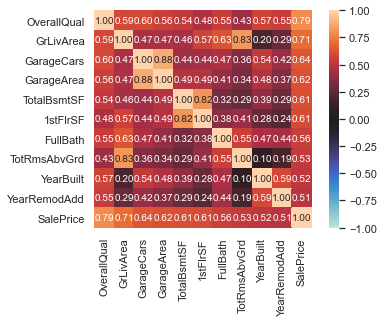

In [ ]:
sns.heatmap(
	x_corr,
	cbar = True,
	square = True,
	vmin = -1.0,
	vmax =  1.0,
	center = 0,
	annot = True,
	annot_kws={ 'size':10 },
	fmt='.2f',
	xticklabels = x_corr.columns.values,
	yticklabels = x_corr.columns.values,
)
plt.show()

### ・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
```py
OverallQual:家屋の全体的な材質と仕上げの評価　最良～貧弱の10段階で評価
GrLivArea:地上部のリビングエリアの広さ（平方フィート）
GarageCars:車庫の広さを自動車の台数で評価
GarageArea:車庫の広さ（平方フィート）
TotalBsmtSF:地下の広さ（平方フィート）
1stFlrSF:1階フロアの広さ（平方フィート）
FullBath:フルバスルームの有無
TotRmsAbvGrd:一定レベル以上の全部屋数
YearBuilt:築年
YearRemodAdd:改築年
```

### ・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
```py
GarageArea　GarageCars：0.882613
TotRmsAbvGrd　alGrLivArea：0.825576
1stFlrSF　TotalBsmtSF：0.819393
```

In [ ]:
x2 = data.loc[:,['GarageArea','GarageCars','TotRmsAbvGrd','GrLivArea','1stFlrSF','TotalBsmtSF','SalePrice']]

In [ ]:
x2_corr = x2.corr(method='pearson', min_periods=1)
print("{}".format(x2_corr))

              GarageArea  GarageCars  TotRmsAbvGrd  GrLivArea  1stFlrSF  \
GarageArea      1.000000    0.882613      0.337915   0.468971  0.489741   
GarageCars      0.882613    1.000000      0.362248   0.467321  0.439726   
TotRmsAbvGrd    0.337915    0.362248      1.000000   0.825576  0.409901   
GrLivArea       0.468971    0.467321      0.825576   1.000000  0.566084   
1stFlrSF        0.489741    0.439726      0.409901   0.566084  1.000000   
TotalBsmtSF     0.486719    0.435279      0.286125   0.455001  0.819393   
SalePrice       0.623423    0.640473      0.533779   0.708618  0.605968   

              TotalBsmtSF  SalePrice  
GarageArea       0.486719   0.623423  
GarageCars       0.435279   0.640473  
TotRmsAbvGrd     0.286125   0.533779  
GrLivArea        0.455001   0.708618  
1stFlrSF         0.819393   0.605968  
TotalBsmtSF      1.000000   0.613905  
SalePrice        0.613905   1.000000  


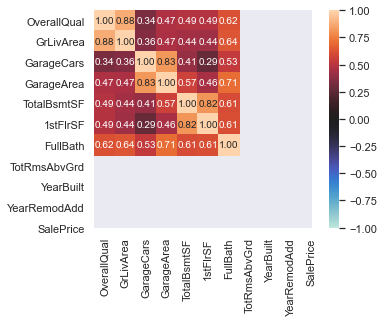

In [ ]:
sns.heatmap(
	x2_corr,
	cbar = True,
	square = True,
	vmin = -1.0,
	vmax =  1.0,
	center = 0,
	annot = True,
	annot_kws={ 'size':10 },
	fmt='.2f',
	xticklabels = x_corr.columns.values,
	yticklabels = x_corr.columns.values,
)
plt.show()